#  EDA OF GOLD PRICES
time range  of train : 2005-01-03 to 2016-05-17

time range of test : 2016-05-18 to 2025-09-09






In [3]:
!pip install yfinance

import yfinance as yf
import pandas as pd

# Get gold prices using the ticker symbol for gold futures (GC=F)
# and specify the start and end dates.
gold_data = yf.download("GC=F", start="2005-02-01", end="2025-10-31")

# Display the first few rows of the data
display(gold_data.head())

/tmp/ipython-input-1150238993.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_data = yf.download("GC=F", start="2005-02-01", end="2025-10-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2005-02-01,420.799988,422.299988,419.200012,422.200012,1461
2005-02-02,421.100006,422.299988,419.799988,420.899994,426
2005-02-03,416.600006,421.299988,414.700012,421.299988,574
2005-02-04,414.000000,417.799988,413.700012,416.399994,320
2005-02-07,413.600006,416.000000,412.500000,414.100006,534


In [4]:
# Flatten the multi-level columns
gold_data.columns = ['_'.join(col).strip() for col in gold_data.columns.values]

# Reset the index to make 'Date' a column
gold_data = gold_data.reset_index()

# Display the first few rows with flattened columns
display(gold_data.head())

,Date,Close_GC=F,High_GC=F,Low_GC=F,Open_GC=F,Volume_GC=F
0,2005-02-01,420.799988,422.299988,419.200012,422.200012,1461
1,2005-02-02,421.100006,422.299988,419.799988,420.899994,426
2,2005-02-03,416.600006,421.299988,414.700012,421.299988,574
3,2005-02-04,414.000000,417.799988,413.700012,416.399994,320
4,2005-02-07,413.600006,416.000000,412.500000,414.100006,534


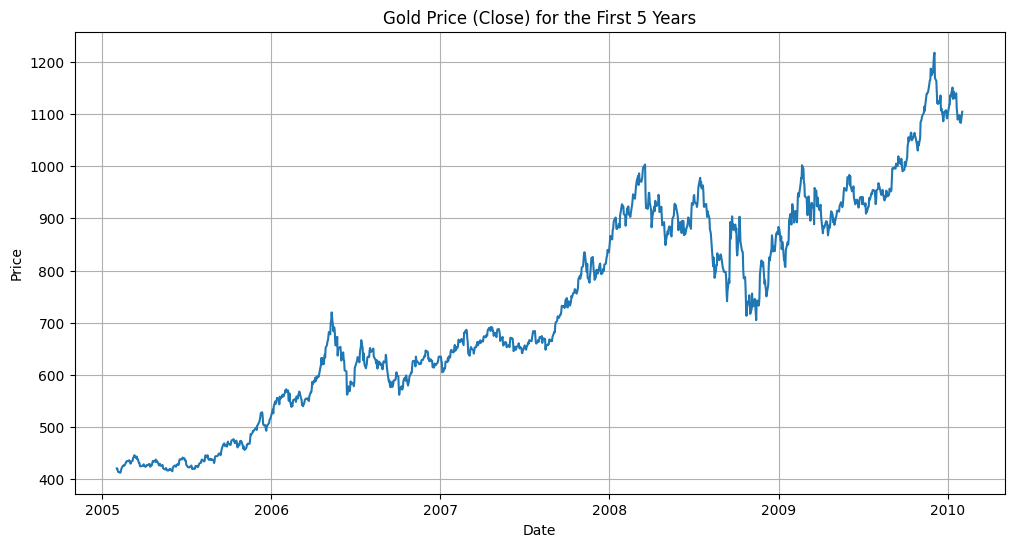

In [5]:
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Filter data for the first 5 years
start_date = gold_data['Date'].min()
end_date = start_date + pd.DateOffset(years=5)
gold_data_5years = gold_data[(gold_data['Date'] >= start_date) & (gold_data['Date'] <= end_date)]

# Plot the 'Close_GC=F' price
plt.figure(figsize=(12, 6))
plt.plot(gold_data_5years['Date'], gold_data_5years['Close_GC=F'])
plt.title('Gold Price (Close) for the First 5 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# OBSERVATION 1
the chart shows that the fluctation size is proportional to the price of gold. its a multiplicative time series

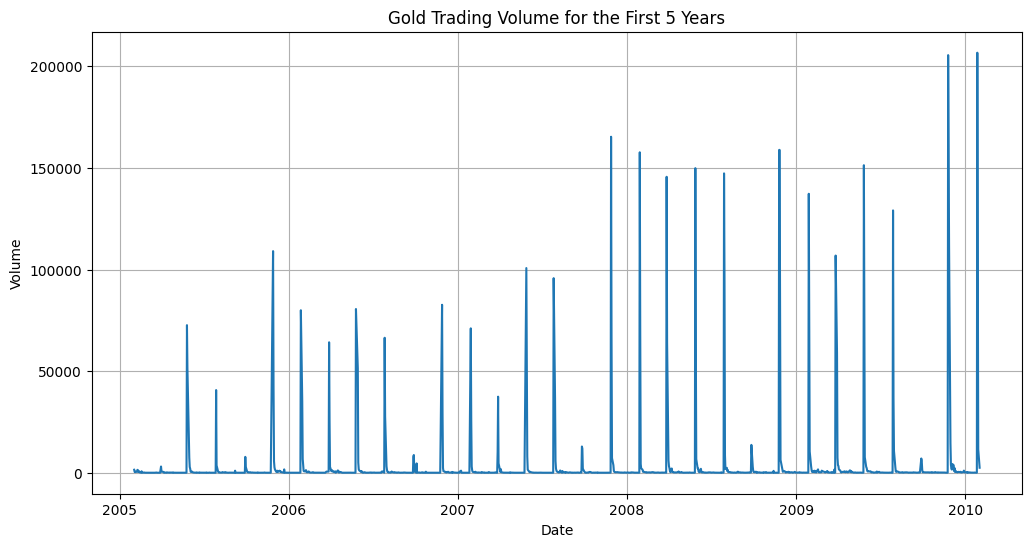

In [6]:
# Plot the 'Volume_GC=F'
plt.figure(figsize=(12, 6))
plt.plot(gold_data_5years['Date'], gold_data_5years['Volume_GC=F'])
plt.title('Gold Trading Volume for the First 5 Years')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [8]:
# Check the number of zeros in the 'Volume_GC=F' column
zero_volume_count = (gold_data['Volume_GC=F'] == 0).sum()

print(f"Number of zeros in Volume_GC=F: {zero_volume_count}")

Number of zeros in Volume_GC=F: 148


In [11]:
# Create a DataFrame with zero volume
zero_volume_df = gold_data[gold_data['Volume_GC=F'] == 0]

# Display the first few rows of the zero volume DataFrame
display(zero_volume_df.head())
display(zero_volume_df.tail())

,Date,Close_GC=F,High_GC=F,Low_GC=F,Open_GC=F,Volume_GC=F
22,2005-03-04,434.200012,434.200012,434.200012,434.200012,0
23,2005-03-07,435.000000,435.000000,435.000000,435.000000,0
24,2005-03-08,440.299988,440.299988,440.299988,440.299988,0
25,2005-03-09,442.100006,442.100006,442.100006,442.100006,0
27,2005-03-11,446.200012,446.399994,446.399994,446.399994,0


,Date,Close_GC=F,High_GC=F,Low_GC=F,Open_GC=F,Volume_GC=F
4569,2023-04-06,2011.900024,2023.300049,2005.000000,2022.199951,0
5121,2025-06-18,3389.800049,3391.899902,3365.100098,3385.300049,0
5131,2025-07-03,3331.600098,3362.000000,3322.300049,3362.000000,0
5132,2025-07-04,3332.500000,3342.000000,3332.500000,3342.000000,0
5172,2025-08-29,3473.699951,3475.600098,3426.600098,3432.500000,0


1. 148 days have 0 volume this must be checked

2. the seasonality(presence:) of volume must be checked too

3. must cross verify this 0 value

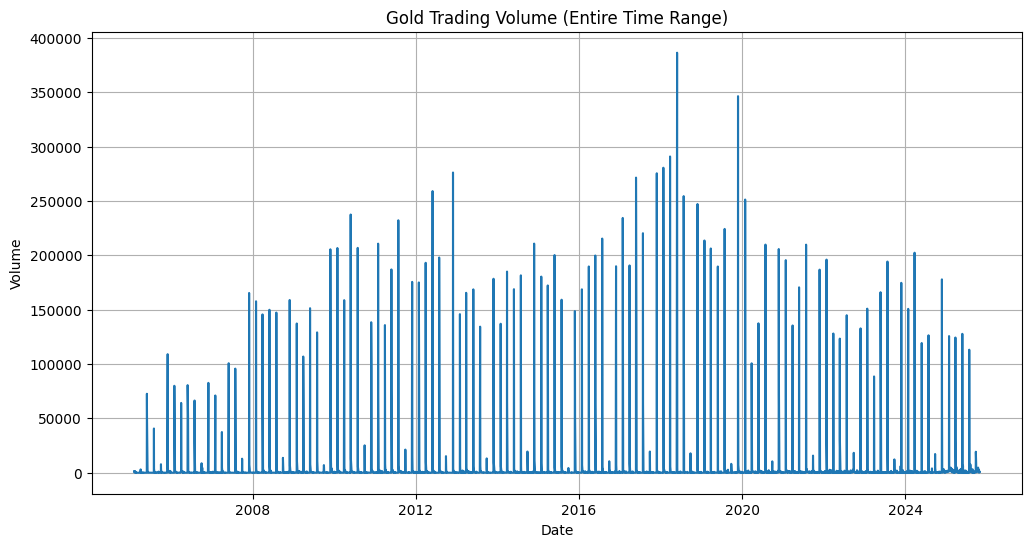

In [12]:
# Plot the 'Volume_GC=F' for the entire time range
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Date'], gold_data['Volume_GC=F'])
plt.title('Gold Trading Volume (Entire Time Range)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Task
Check for seasonality in the `Volume` column of the `gold_data` DataFrame.

## Resample data

### Subtask:
Resample the `gold_data` to a lower frequency (e.g., monthly or quarterly) to better observe seasonal patterns.


**Reasoning**:
Set the 'Date' column as the index and resample the DataFrame to monthly frequency to observe seasonal patterns in volume.



In [13]:
gold_data = gold_data.set_index('Date')

# Resample to monthly frequency and calculate the mean volume
monthly_volume = gold_data['Volume_GC=F'].resample('M').mean()

# Display the first few rows of the resampled DataFrame
display(monthly_volume.head())

/tmp/ipython-input-1180586822.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = gold_data['Volume_GC=F'].resample('M').mean()


,Volume_GC=F
Date,
2005-02-28,445.684211
2005-03-31,151.000000
2005-04-30,128.950000
2005-05-31,6262.333333
2005-06-30,330.952381


**Reasoning**:
The monthly resampling was successful. Display the last few rows of the resampled data to verify the resampling covers the entire time range.



In [14]:
display(monthly_volume.tail())

,Volume_GC=F
Date,
2025-06-30,1098.550000
2025-07-31,6207.565217
2025-08-31,1728.000000
2025-09-30,1839.380952
2025-10-31,1911.909091


## Decompose time series

### Subtask:
Decompose the resampled volume time series into trend, seasonal, and residual components.


**Reasoning**:
Decompose the monthly volume time series into trend, seasonal, and residual components using the multiplicative model as observed earlier.



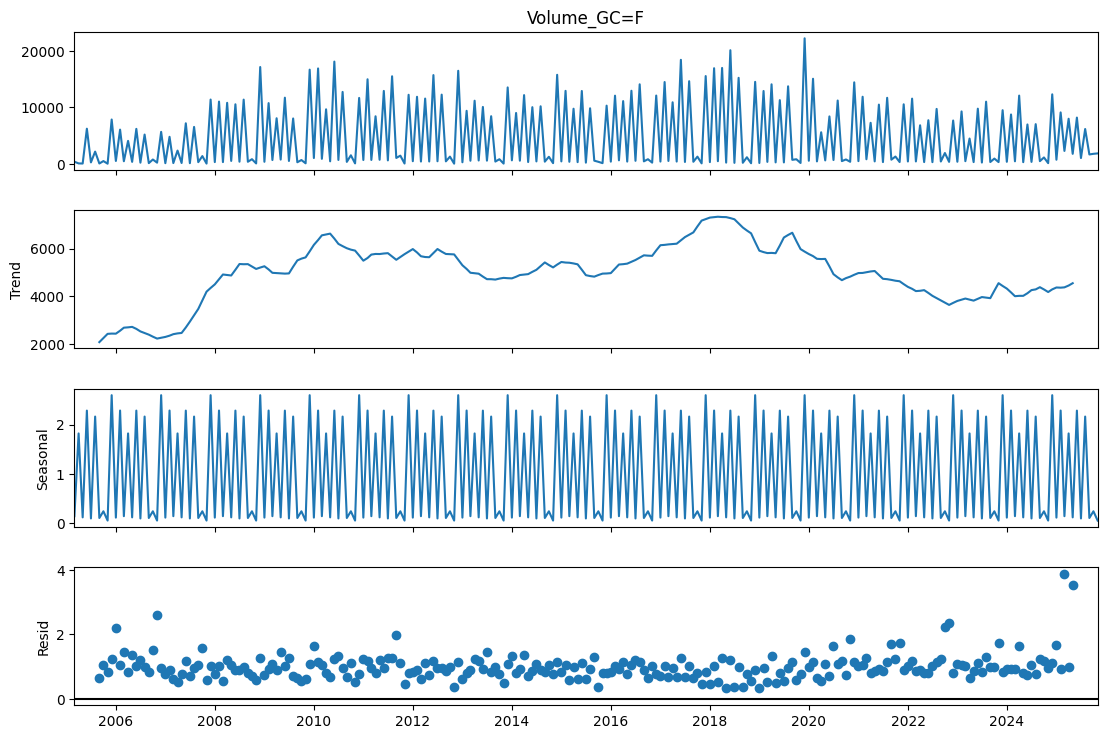

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the monthly volume time series
decomposition = seasonal_decompose(monthly_volume, model='multiplicative')

# Display the decomposition plots
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

## Statistical testing (optional)

### Subtask:
Use statistical tests like OLS regression to confirm the presence and significance of seasonality.


**Reasoning**:
Create seasonal dummy variables and perform OLS regression to check for seasonality in the monthly volume.



In [18]:
# Rename the column to remove special characters
monthly_volume_df = monthly_volume.to_frame()
monthly_volume_df = monthly_volume_df.rename(columns={'Volume_GC=F': 'Volume_GC_F'})

# Create seasonal dummy variables
monthly_volume_df['month'] = monthly_volume_df.index.month
seasonal_dummies = pd.get_dummies(monthly_volume_df['month'], prefix='month', drop_first=True)
monthly_volume_df = pd.concat([monthly_volume_df, seasonal_dummies], axis=1)

# Create formula string with the renamed column
formula = 'Volume_GC_F ~ ' + ' + '.join(seasonal_dummies.columns)

# Fit OLS model
model = ols(formula, data=monthly_volume_df).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Volume_GC_F   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     102.8
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.17e-83
Time:                        07:40:35   Log-Likelihood:                -2287.7
No. Observations:                 249   AIC:                             4599.
Df Residuals:                     237   BIC:                             4642.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          1.15e+04    542.201  

## Summary:

### Data Analysis Key Findings

*   The data was successfully resampled to a monthly frequency, and the mean volume was calculated for each month.
*   The time series decomposition revealed distinct seasonal patterns in the monthly volume data, in addition to trend and residual components.
*   The OLS regression analysis confirmed the statistical significance of seasonality, with an R-squared value of 0.827 and a Prob (F-statistic) of 1.17e-83.
*   Several individual months (February, March, April, June, August, September, October, and December) showed statistically significant differences in average volume compared to the reference month (January), further supporting the presence of seasonality.

### Insights or Next Steps

*   The identified seasonality can be incorporated into future volume forecasting models to improve accuracy.
*   Further investigation into the underlying reasons for the observed seasonal patterns in gold volume could provide valuable market insights.


/tmp/ipython-input-2595285663.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = gold_data['Close_GC=F'].resample('M').mean()


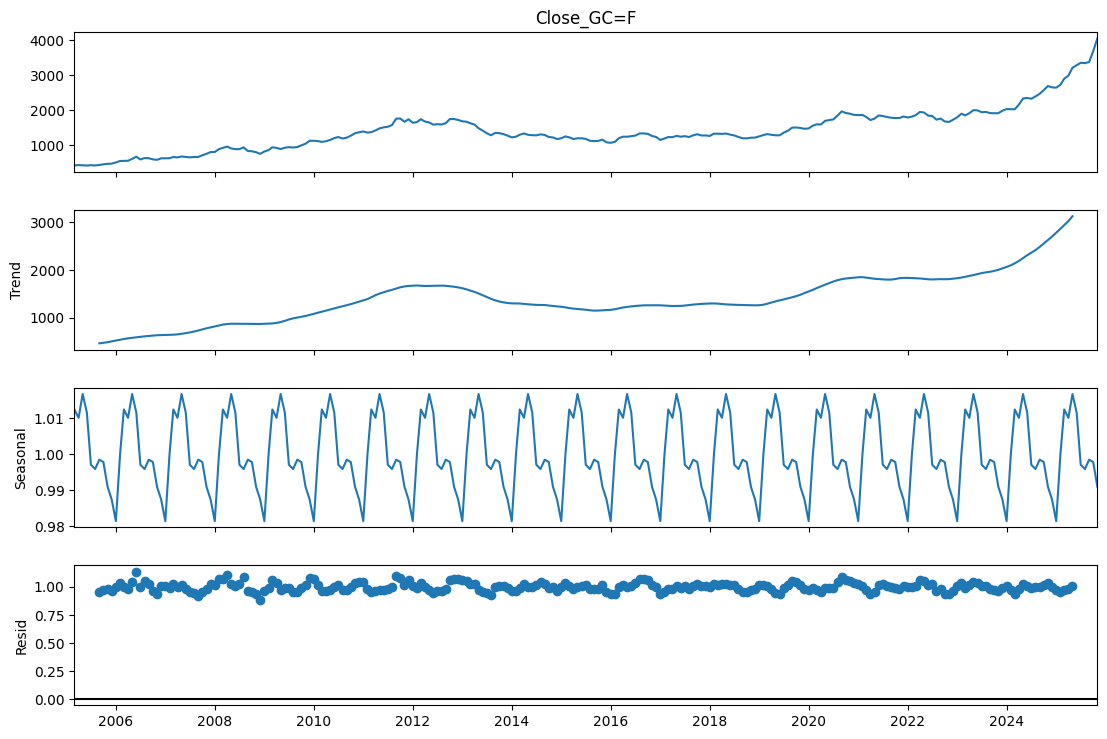

In [20]:
# Resample the gold price data to monthly frequency and calculate the mean
monthly_price = gold_data['Close_GC=F'].resample('M').mean()

# Decompose the monthly price time series using the multiplicative model
decomposition_price = seasonal_decompose(monthly_price, model='multiplicative')

# Display the decomposition plots
fig_price = decomposition_price.plot()
fig_price.set_size_inches(12, 8)
plt.show()

Trend: There appears to be a clear upward trend in gold prices over the entire time range.
Seasonality: The seasonal component shows some recurring patterns within each year, indicating the presence of seasonality in gold prices.
Residuals: The residuals show the remaining variation after removing the trend and seasonal components.

In [22]:
# Reset the index to make 'Date' a column again
gold_data = gold_data.reset_index()

# Calculate the first-order difference of the 'Close_GC=F' column
gold_data['Close_GC_F_diff1'] = gold_data['Close_GC=F'].diff(1)

# Calculate the second-order difference of the 'Close_GC=F' column
gold_data['Close_GC_F_diff2'] = gold_data['Close_GC=F'].diff(2)

# Create a new DataFrame with the original price and the differences
price_diff_df = gold_data[['Date', 'Close_GC=F', 'Close_GC_F_diff1', 'Close_GC_F_diff2']].copy()

# Display the first few rows of the new DataFrame
display(price_diff_df.head())

,Date,Close_GC=F,Close_GC_F_diff1,Close_GC_F_diff2
0,2005-02-01,420.799988,NaN,NaN
1,2005-02-02,421.100006,0.300018,NaN
2,2005-02-03,416.600006,-4.500000,-4.199982
3,2005-02-04,414.000000,-2.600006,-7.100006
4,2005-02-07,413.600006,-0.399994,-3.000000


In [23]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the first-order difference
adf_diff1 = adfuller(gold_data['Close_GC_F_diff1'].dropna())
print('ADF Test for First-Order Difference:')
print(f'ADF Statistic: {adf_diff1[0]}')
print(f'p-value: {adf_diff1[1]}')
print('Critical Values:')
for key, value in adf_diff1[4].items():
    print(f'\t{key}: {value}')

print('\n' + '='*40 + '\n')

# Perform ADF test on the second-order difference
adf_diff2 = adfuller(gold_data['Close_GC_F_diff2'].dropna())
print('ADF Test for Second-Order Difference:')
print(f'ADF Statistic: {adf_diff2[0]}')
print(f'p-value: {adf_diff2[1]}')
print('Critical Values:')
for key, value in adf_diff2[4].items():
    print(f'\t{key}: {value}')

ADF Test for First-Order Difference:
ADF Statistic: -12.342071373387729
p-value: 6.086927620319647e-23
Critical Values:
	1%: -3.4316113339347782
	5%: -2.8620973776286194
	10%: -2.5670666920274097


ADF Test for Second-Order Difference:
ADF Statistic: -11.81979032933219
p-value: 8.4679512124900425e-22
Critical Values:
	1%: -3.431613039285884
	5%: -2.862098131055356
	10%: -2.5670670931038595


# How the ADF test works     
Null Hypothesis (\(H_{0}\)): The time series has a unit root and is therefore non-stationary.

Alternative Hypothesis (\(H_{1}\)): The time series is stationary.  Test Statistic: A test statistic is calculated from the data. This value is compared to critical values to determine the outcome.

 p-value: A p-value is generated from the test. If the p-value is less than a chosen significance level (e.g., 0.05), the null hypothesis is rejected, and the series is considered stationary. If the p-value is greater than the significance level, the null hypothesis is not rejected, and the series is considered non-stationary.

so just differncing does not make the data stationary. this is logical since the series is multiplicative the variance also grows

In [24]:
import numpy as np

# Calculate the logarithm of the 'Close_GC=F' column
gold_data['Log_Close_GC_F'] = np.log(gold_data['Close_GC=F'])

# Calculate the first-order difference of the log close price
gold_data['Log_Close_GC_F_diff1'] = gold_data['Log_Close_GC_F'].diff(1)

# Calculate the second-order difference of the log close price
gold_data['Log_Close_GC_F_diff2'] = gold_data['Log_Close_GC_F'].diff(2)

# Create a new DataFrame with the original price, log price, and the differences
log_price_diff_df = gold_data[['Date', 'Close_GC=F', 'Log_Close_GC_F', 'Log_Close_GC_F_diff1', 'Log_Close_GC_F_diff2']].copy()

# Display the first few rows of the new DataFrame
display(log_price_diff_df.head())

,Date,Close_GC=F,Log_Close_GC_F,Log_Close_GC_F_diff1,Log_Close_GC_F_diff2
0,2005-02-01,420.799988,6.042158,NaN,NaN
1,2005-02-02,421.100006,6.042870,0.000713,NaN
2,2005-02-03,416.600006,6.032127,-0.010744,-0.010031
3,2005-02-04,414.000000,6.025866,-0.006261,-0.017004
4,2005-02-07,413.600006,6.024899,-0.000967,-0.007227


In [25]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the first-order difference of the log price
adf_log_diff1 = adfuller(gold_data['Log_Close_GC_F_diff1'].dropna())
print('ADF Test for First-Order Difference of Log Price:')
print(f'ADF Statistic: {adf_log_diff1[0]}')
print(f'p-value: {adf_log_diff1[1]}')
print('Critical Values:')
for key, value in adf_log_diff1[4].items():
    print(f'\t{key}: {value}')

print('\n' + '='*40 + '\n')

# Perform ADF test on the second-order difference of the log price
adf_log_diff2 = adfuller(gold_data['Log_Close_GC_F_diff2'].dropna())
print('ADF Test for Second-Order Difference of Log Price:')
print(f'ADF Statistic: {adf_log_diff2[0]}')
print(f'p-value: {adf_log_diff2[1]}')
print('Critical Values:')
for key, value in adf_log_diff2[4].items():
    print(f'\t{key}: {value}')

ADF Test for First-Order Difference of Log Price:
ADF Statistic: -28.693475815947007
p-value: 0.0
Critical Values:
	1%: -3.431606245400705
	5%: -2.8620951295038894
	10%: -2.567065495269301


ADF Test for Second-Order Difference of Log Price:
ADF Statistic: -13.573107613100865
p-value: 2.195542915316927e-25
Critical Values:
	1%: -3.431613039285884
	5%: -2.862098131055356
	10%: -2.5670670931038595


First-Order Difference of Log Price: The p-value is 0.0, which is significantly less than 0.05. This indicates that the first-order difference of the log gold price is stationary.

Second-Order Difference of Log Price: The p-value is 2.195542915316927e-25, which is also much less than 0.05. This indicates that the second-order difference of the log gold price is also stationary.

In [26]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test on the first-order difference of the log price
kpss_log_diff1 = kpss(gold_data['Log_Close_GC_F_diff1'].dropna())
print('KPSS Test for First-Order Difference of Log Price:')
print(f'KPSS Statistic: {kpss_log_diff1[0]}')
print(f'p-value: {kpss_log_diff1[1]}')
print('Critical Values:')
for key, value in kpss_log_diff1[3].items():
    print(f'\t{key}: {value}')

print('\n' + '='*40 + '\n')

# Perform KPSS test on the second-order difference of the log price
kpss_log_diff2 = kpss(gold_data['Log_Close_GC_F_diff2'].dropna())
print('KPSS Test for Second-Order Difference of Log Price:')
print(f'KPSS Statistic: {kpss_log_diff2[0]}')
print(f'p-value: {kpss_log_diff2[1]}')
print('Critical Values:')
for key, value in kpss_log_diff2[3].items():
    print(f'\t{key}: {value}')

KPSS Test for First-Order Difference of Log Price:
KPSS Statistic: 0.19984061435826028
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


KPSS Test for Second-Order Difference of Log Price:
KPSS Statistic: 0.2087405073556562
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/tmp/ipython-input-180295655.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_log_diff1 = kpss(gold_data['Log_Close_GC_F_diff1'].dropna())
/tmp/ipython-input-180295655.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_log_diff2 = kpss(gold_data['Log_Close_GC_F_diff2'].dropna())


 the null hypothesis is that the series is stationary. If the p-value is less than your significance level (e.g., 0.05), you reject the null hypothesis and conclude the series is non-stationary. If the p-value is greater than 0.05, you fail to reject the null hypothesis, suggesting the series is stationary.

Based on the output:

KPSS Test for First-Order Difference of Log Price: The p-value is 0.1, which is greater than 0.05. This suggests that the first-order difference of the log gold price is stationary.
KPSS Test for Second-Order Difference of Log Price: The p-value is 0.1, which is also greater than 0.05. This suggests that the second-order difference of the log gold price is also stationary.

# volume zero reason
The yfinance library often shows zero volume for gold because you are likely using a gold futures symbol (e.g., GC=F), and the trading volume for futures is reported differently than for stocks. It is a common data discrepancy in the yfinance package, as volume for futures contracts might not be available in real-time or reported in the same format as stock volumes.



In [27]:
# Create a new DataFrame with 'Date' and 'Volume_GC=F'
volume_df = gold_data[['Date', 'Volume_GC=F']].copy()

# Replace zero volumes with NaN to facilitate moving average calculation
volume_df['Volume_GC=F'] = volume_df['Volume_GC=F'].replace(0, np.nan)

# Calculate a moving average (e.g., a 5-day moving average)
# You can adjust the window size as needed
window_size = 5
volume_df['Volume_GC=F_MA'] = volume_df['Volume_GC=F'].rolling(window=window_size, min_periods=1).mean()

# Fill the NaN values (originally zeros) with the calculated moving average
volume_df['Volume_GC=F'].fillna(volume_df['Volume_GC=F_MA'], inplace=True)

# Drop the temporary moving average column
volume_df = volume_df.drop('Volume_GC=F_MA', axis=1)

# Display the first few rows of the updated DataFrame
display(volume_df.head())
display(volume_df.loc[zero_volume_df.index].head()) # Display some rows where volume was originally zero

/tmp/ipython-input-4184998502.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  volume_df['Volume_GC=F'].fillna(volume_df['Volume_GC=F_MA'], inplace=True)


,Date,Volume_GC=F
0,2005-02-01,1461.0
1,2005-02-02,426.0
2,2005-02-03,574.0
3,2005-02-04,320.0
4,2005-02-07,534.0


,Date,Volume_GC=F
22,2005-03-04,4.75
23,2005-03-07,1.00
24,2005-03-08,1.00
25,2005-03-09,1.00
27,2005-03-11,1.00


In [29]:
# Check the number of zeros in the 'Volume_GC=F' column in the updated DataFrame
zero_volume_count_updated = (volume_df['Volume_GC=F'] == 0).sum()

print(f"Number of zeros in Volume_GC=F after imputation: {zero_volume_count_updated}")

Number of zeros in Volume_GC=F after imputation: 0


In [30]:
import numpy as np

# Calculate the logarithm of the 'Volume_GC=F' column
# Add a small constant to avoid log(0) if there were any issues with imputation
volume_df['Log_Volume_GC_F'] = np.log(volume_df['Volume_GC=F'] + 1e-9)

# Calculate the first-order difference of the log volume
volume_df['Log_Volume_GC_F_diff1'] = volume_df['Log_Volume_GC_F'].diff(1)

# Calculate the second-order difference of the log volume
volume_df['Log_Volume_GC_F_diff2'] = volume_df['Log_Volume_GC_F'].diff(2)

# Display the first few rows of the updated DataFrame
display(volume_df.head())

,Date,Volume_GC=F,Log_Volume_GC_F,Log_Volume_GC_F_diff1,Log_Volume_GC_F_diff2
0,2005-02-01,1461.0,7.286876,NaN,NaN
1,2005-02-02,426.0,6.054439,-1.232437,NaN
2,2005-02-03,574.0,6.352629,0.298190,-0.934247
3,2005-02-04,320.0,5.768321,-0.584308,-0.286118
4,2005-02-07,534.0,6.280396,0.512075,-0.072234


In [31]:
from statsmodels.tsa.stattools import adfuller, kpss

# Perform ADF test on the first-order difference of the log volume
adf_log_volume_diff1 = adfuller(volume_df['Log_Volume_GC_F_diff1'].dropna())
print('ADF Test for First-Order Difference of Log Volume:')
print(f'ADF Statistic: {adf_log_volume_diff1[0]}')
print(f'p-value: {adf_log_volume_diff1[1]}')
print('Critical Values:')
for key, value in adf_log_volume_diff1[4].items():
    print(f'\t{key}: {value}')

print('\n' + '='*40 + '\n')

# Perform KPSS test on the first-order difference of the log volume
kpss_log_volume_diff1 = kpss(volume_df['Log_Volume_GC_F_diff1'].dropna())
print('KPSS Test for First-Order Difference of Log Volume:')
print(f'KPSS Statistic: {kpss_log_volume_diff1[0]}')
print(f'p-value: {kpss_log_volume_diff1[1]}')
print('Critical Values:')
for key, value in kpss_log_volume_diff1[3].items():
    print(f'\t{key}: {value}')

ADF Test for First-Order Difference of Log Volume:
ADF Statistic: -21.0785539782761
p-value: 0.0
Critical Values:
	1%: -3.4316201537135442
	5%: -2.8621012742157625
	10%: -2.567068766323239


KPSS Test for First-Order Difference of Log Volume:
KPSS Statistic: 0.29611335025018726
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/tmp/ipython-input-781293278.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_log_volume_diff1 = kpss(volume_df['Log_Volume_GC_F_diff1'].dropna())


ADF Test for First-Order Difference of Log Volume: The p-value is 0.0, which is significantly less than 0.05. This leads us to reject the null hypothesis of non-stationarity and suggests that the first-order difference of the log volume is stationary.
KPSS Test for First-Order Difference of Log Volume: The p-value is 0.1, which is greater than 0.05. This leads us to fail to reject the null hypothesis of stationarity and suggests that the first-order difference of the log volume is stationary.

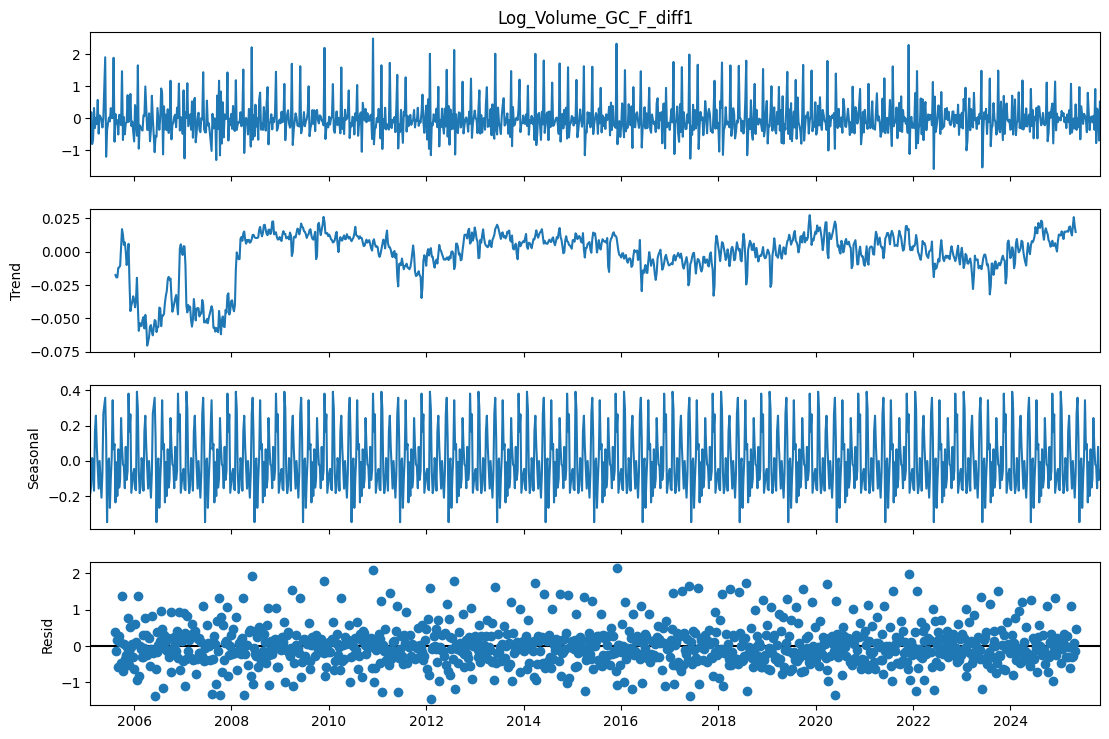

In [38]:
# Resample the log-differenced volume to weekly frequency and calculate the mean
weekly_log_volume_diff1 = volume_df_indexed['Log_Volume_GC_F_diff1'].resample('W').mean().dropna()

# Decompose the weekly log-differenced volume time series
# Use an additive model since differencing is expected to remove multiplicative effects
decomposition_weekly_log_volume_diff1 = seasonal_decompose(weekly_log_volume_diff1, model='additive', period=52)

# Display the decomposition plots
fig_weekly_log_volume_diff1 = decomposition_weekly_log_volume_diff1.plot()
fig_weekly_log_volume_diff1.set_size_inches(12, 8)
plt.show()

In [39]:
# Calculate the daily percentage change of the 'Close_GC=F' column
gold_data['Close_GC_F_pct_change'] = gold_data['Close_GC=F'].pct_change()

# Create a new DataFrame with 'Date', 'Close_GC=F', and the percentage change
price_pct_change_df = gold_data[['Date', 'Close_GC=F', 'Close_GC_F_pct_change']].copy()

# Display the first few rows of the new DataFrame
display(price_pct_change_df.head())

,Date,Close_GC=F,Close_GC_F_pct_change
0,2005-02-01,420.799988,NaN
1,2005-02-02,421.100006,0.000713
2,2005-02-03,416.600006,-0.010686
3,2005-02-04,414.000000,-0.006241
4,2005-02-07,413.600006,-0.000966


In [40]:
from statsmodels.tsa.stattools import adfuller, kpss

# Perform ADF test on the daily percentage change
adf_pct_change = adfuller(gold_data['Close_GC_F_pct_change'].dropna())
print('ADF Test for Daily Percentage Change:')
print(f'ADF Statistic: {adf_pct_change[0]}')
print(f'p-value: {adf_pct_change[1]}')
print('Critical Values:')
for key, value in adf_pct_change[4].items():
    print(f'\t{key}: {value}')

print('\n' + '='*40 + '\n')

# Perform KPSS test on the daily percentage change
kpss_pct_change = kpss(gold_data['Close_GC_F_pct_change'].dropna())
print('KPSS Test for Daily Percentage Change:')
print(f'KPSS Statistic: {kpss_pct_change[0]}')
print(f'p-value: {kpss_pct_change[1]}')
print('Critical Values:')
for key, value in kpss_pct_change[3].items():
    print(f'\t{key}: {value}')

ADF Test for Daily Percentage Change:
ADF Statistic: -28.7073319330907
p-value: 0.0
Critical Values:
	1%: -3.431606245400705
	5%: -2.8620951295038894
	10%: -2.567065495269301


KPSS Test for Daily Percentage Change:
KPSS Statistic: 0.21181068091034658
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/tmp/ipython-input-457460546.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_pct_change = kpss(gold_data['Close_GC_F_pct_change'].dropna())


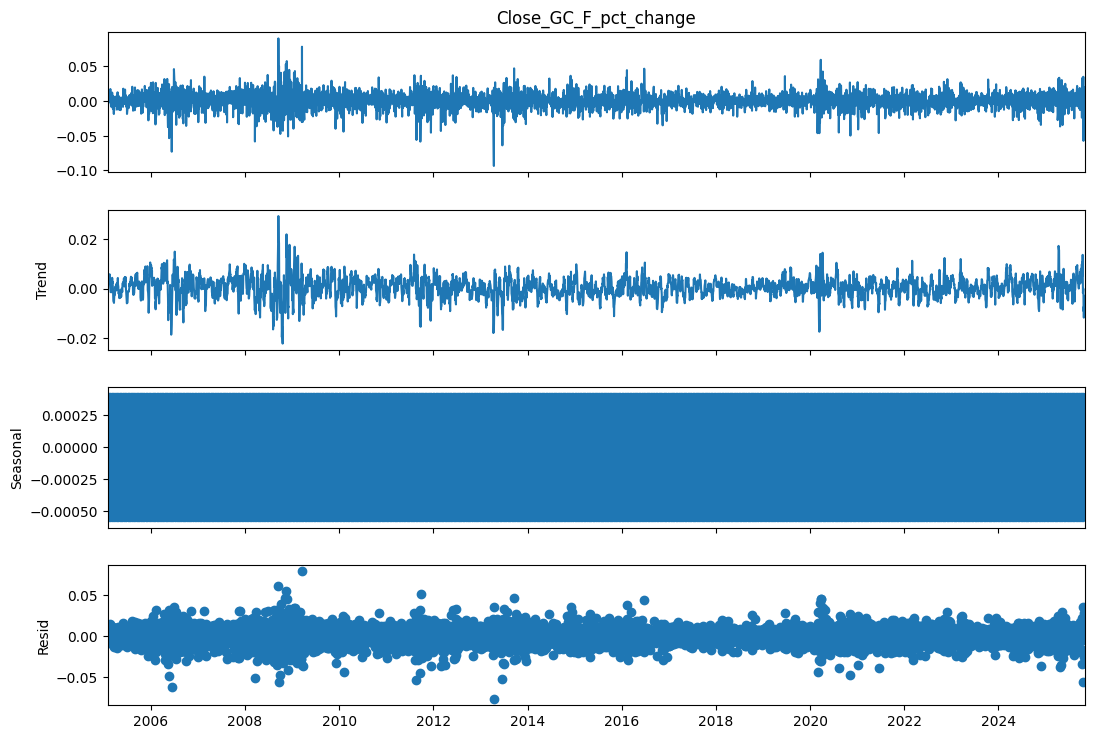

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Date' column as the index for decomposition
gold_data_indexed = gold_data.set_index('Date')

# Decompose the daily percentage change time series
# Use an additive model as percentage changes are typically additive
decomposition_pct_change = seasonal_decompose(gold_data_indexed['Close_GC_F_pct_change'].dropna(), model='additive', period=7)

# Display the decomposition plots
fig_pct_change = decomposition_pct_change.plot()
fig_pct_change.set_size_inches(12, 8)
plt.show()

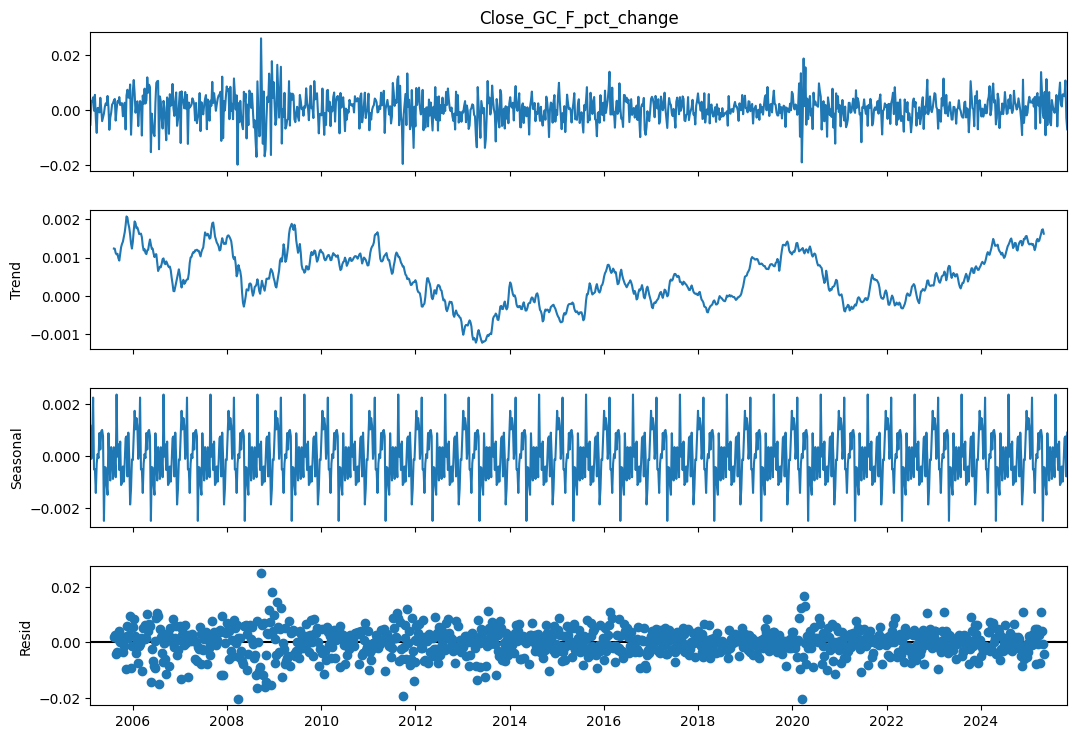

In [42]:
# Resample the daily percentage change to weekly frequency and calculate the mean
weekly_pct_change = gold_data_indexed['Close_GC_F_pct_change'].resample('W').mean().dropna()

# Decompose the weekly percentage change time series
# Use an additive model
decomposition_weekly_pct_change = seasonal_decompose(weekly_pct_change, model='additive', period=52) # Period of 52 for yearly seasonality in weekly data

# Display the decomposition plots
fig_weekly_pct_change = decomposition_weekly_pct_change.plot()
fig_weekly_pct_change.set_size_inches(12, 8)
plt.show()